In [8]:
import numpy as np
import os
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
data_dir = '/home/owaismujtaba/projects/NeuroLab/Results/TrainedModels'


In [15]:
results = {}
for subject in range(21, 31):
    sub_dir = Path(data_dir, str(subject))
    model_dir = Path(sub_dir, 'NeuralNetworkFinal')
    files = os.listdir(model_dir)

    pcc_values = []
    for file in files:
        file_dir = Path(model_dir, file)
        file_data = np.load(file_dir)
        pcc_values.append(float(file_data[-1]))
    results[subject] = pcc_values
    
    

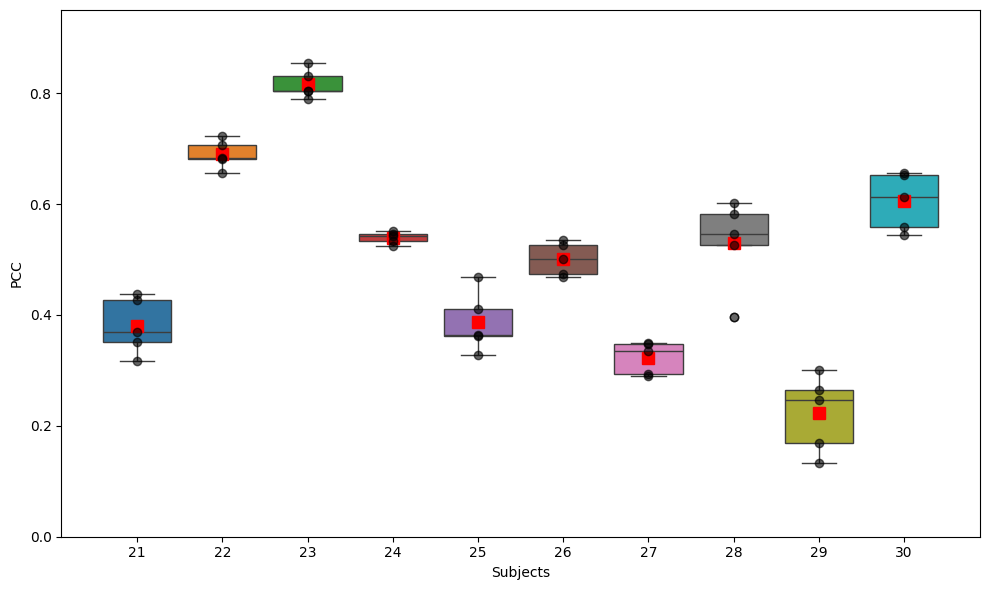

In [16]:
data =results
subjects = list(data.keys())
values = list(data.values())

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=values, zorder=1)

# Add the mean as a square marker
for i, subject_values in enumerate(values):
    mean_value = np.mean(subject_values)
    plt.plot(i, mean_value, marker='s', color='red', markersize=8, label='Mean' if i == 0 else "")

# Add individual data points on top of the box plot
for i, subject_values in enumerate(values):
    plt.scatter([i] * len(subject_values), subject_values, color='black', alpha=0.6, zorder=2, label='Data points' if i == 0 else "")

# Customize the plot
plt.xticks(ticks=np.arange(len(subjects)), labels=subjects)
plt.xlabel("Subjects")
plt.ylabel("PCC")
plt.ylim([0, 0.95])
plt.tight_layout()
plt.savefig('Images/pcc.png', dpi=800)

In [4]:
seeg = np.load('Data\P01_sEEG.npy')
seeg.shape

(307511, 130)

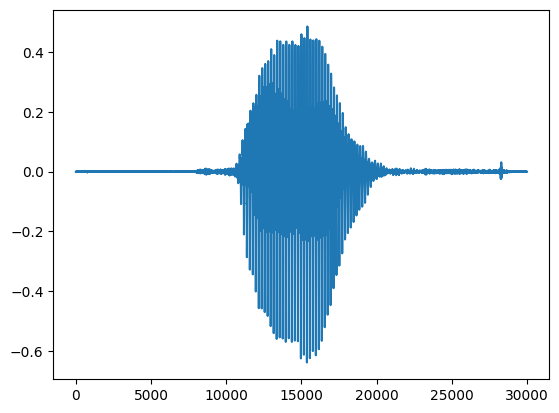

In [ ]:
plt.plot(audio[30000:60000])


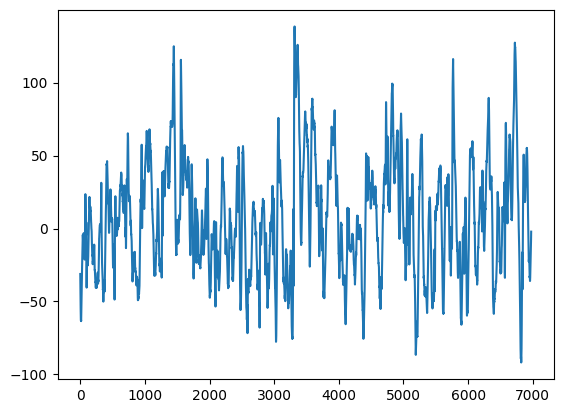

In [16]:
sample = seeg[1024:8000]
sample = np.mean(sample, axis=1)
sample.shape
plt.plot(sample)

In [9]:
seeg.shape

(307511, 130)